<a href="https://colab.research.google.com/github/StewieJean/Jean/blob/master/INTELIGENCIA_LOGICA_DIFUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install fuzzy in your system
!pip install scikit-fuzzy

In [ ]:
# Importando modulos
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [ ]:
#Definiendo variables antecedentes 
Presion_alveolar = ctrl.Antecedent(np.arange(0, 201, 1), 'Presion_alveolar')
Exceso_base = ctrl.Antecedent(np.arange(-10, 11, 1), 'Exceso_base')
Trombocitos = ctrl.Antecedent(np.arange(0, 601, 1), 'Trombocitos')
Creatinina = ctrl.Antecedent(np.arange(0, 201, 1), 'Creatinina')

In [ ]:
#Definiendo variable consecuente
probabilidad_sepsis = ctrl.Consequent(np.arange(0, 101, 1), 'probabilidad_sepsis')

In [ ]:
#personalizando el antecedente Presion_alveolar (Presion parcial en la sangre)
Presion_alveolar['baja']=fuzz.zmf(Presion_alveolar.universe, 0,200)
Presion_alveolar['alta']=fuzz.smf(Presion_alveolar.universe, 0,200)
#personalizando el antecedente Exceso_base
Exceso_base['normal']=fuzz.gaussmf(Exceso_base.universe, 0, 1)
#personalizando el antecedente Trombocitos
Trombocitos['baja']=fuzz.trapmf(Trombocitos.universe, [0, 0, 150, 400]) 
Trombocitos['alta']=fuzz.trapmf(Trombocitos.universe, [150, 400, 600, 600])
#personalizando el antecedente Creatinina
Creatinina['baja']=fuzz.trapmf(Creatinina.universe, [0, 0, 60, 110]) 
Creatinina['alta']=fuzz.trapmf(Creatinina.universe, [60, 110, 200, 200])

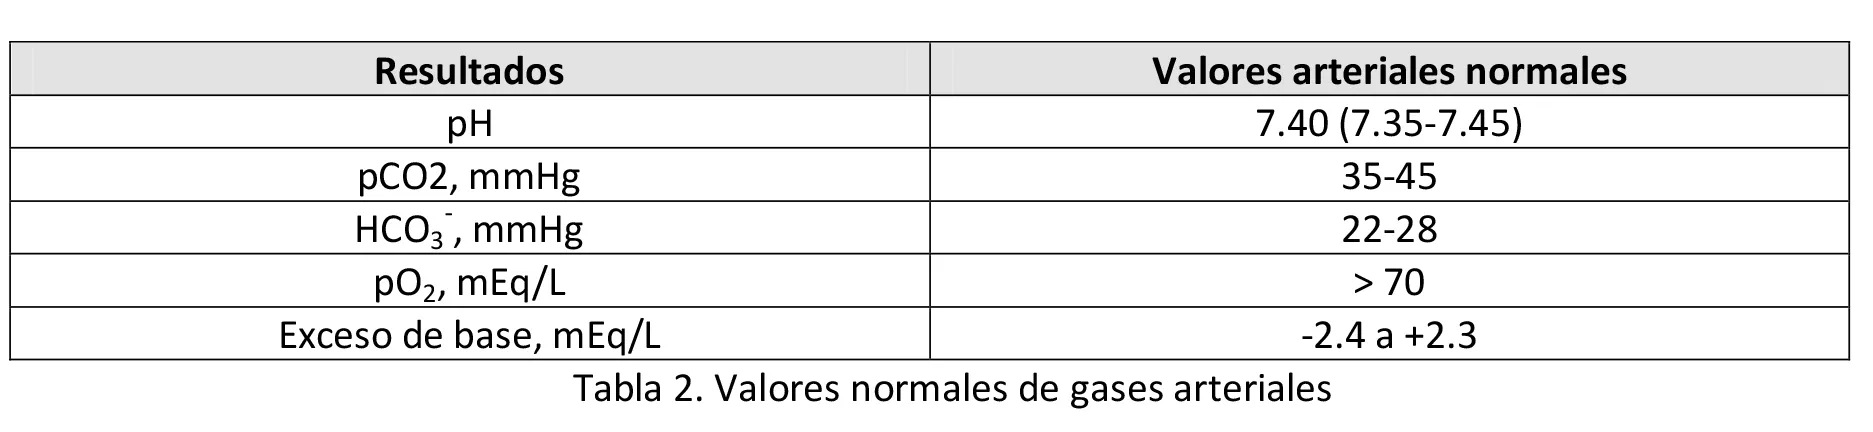

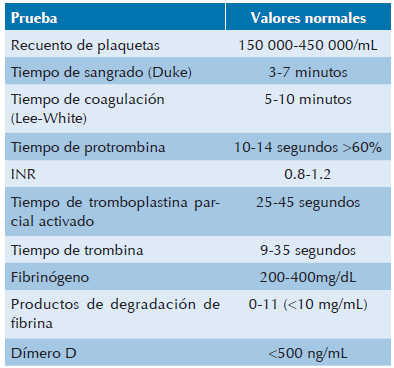

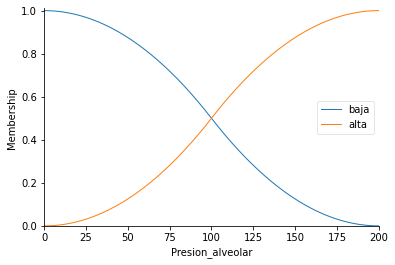

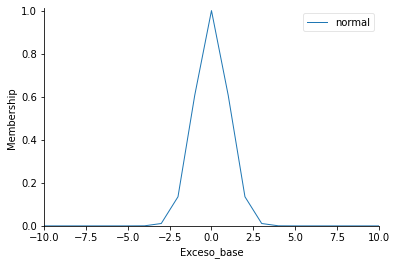

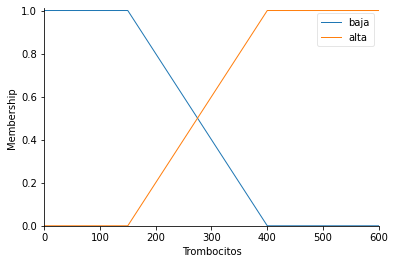

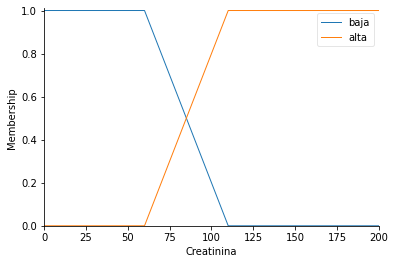

In [ ]:
#Presentando gráficamente las variables antecedentes
Presion_alveolar.view()
Exceso_base.view()
Trombocitos.view()
Creatinina.view()

In [ ]:
#Personalizando el consecuente
probabilidad_sepsis['baja'] = fuzz.trimf(probabilidad_sepsis.universe, [0, 0, 40])
probabilidad_sepsis['alta'] = fuzz.trimf(probabilidad_sepsis.universe, [40, 100, 100])

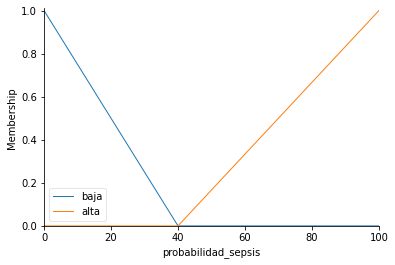

In [ ]:
#Presentando gráficamente la variable consecuente
probabilidad_sepsis.view()

In [ ]:
#Definiendo las reglas difusas
regla1 = ctrl.Rule(Presion_alveolar['baja'] & Trombocitos['alta'] & Creatinina['alta'] & Exceso_base['normal'], probabilidad_sepsis['baja'])
regla2 = ctrl.Rule(Presion_alveolar['alta'] & Trombocitos['baja'] & Creatinina['baja'] & ~(Exceso_base['normal']), probabilidad_sepsis['alta'])

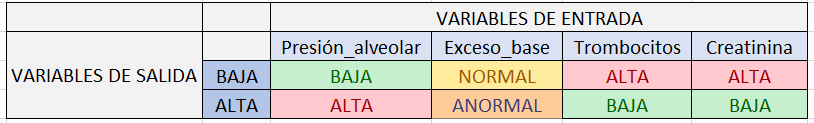

In [ ]:
#Creando el sistema de control y simulación
sepsis_ctrl = ctrl.ControlSystem([regla1, regla2])
sepsis_sim = ctrl.ControlSystemSimulation(sepsis_ctrl)

In [ ]:
# Entrada
sepsis_sim.input['Presion_alveolar'] = 82
sepsis_sim.input['Exceso_base'] = -2.5
sepsis_sim.input['Trombocitos'] = 311
sepsis_sim.input['Creatinina'] = 110

In [ ]:
# Cálculo
sepsis_sim.compute()
sepsis_sim.output

OrderedDict([('probabilidad_sepsis', 19.277053985833504)])

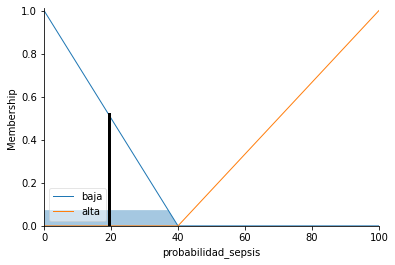

In [ ]:
probabilidad_sepsis.view(sim=sepsis_sim)